
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 59.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 39.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=89b5634380d4e4cc7b24b4317de9bdbf263f0fecd9bd5d1042421d5127634db0
  Stored in directory: /home/codespace/.cache/pi

/tmp/ipykernel_1907/3952855693.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Wochentag', y='Umsatz', data=wetter_umsatzdaten_kiwo, order=weekday_order, ci=95, capsize=0.1)


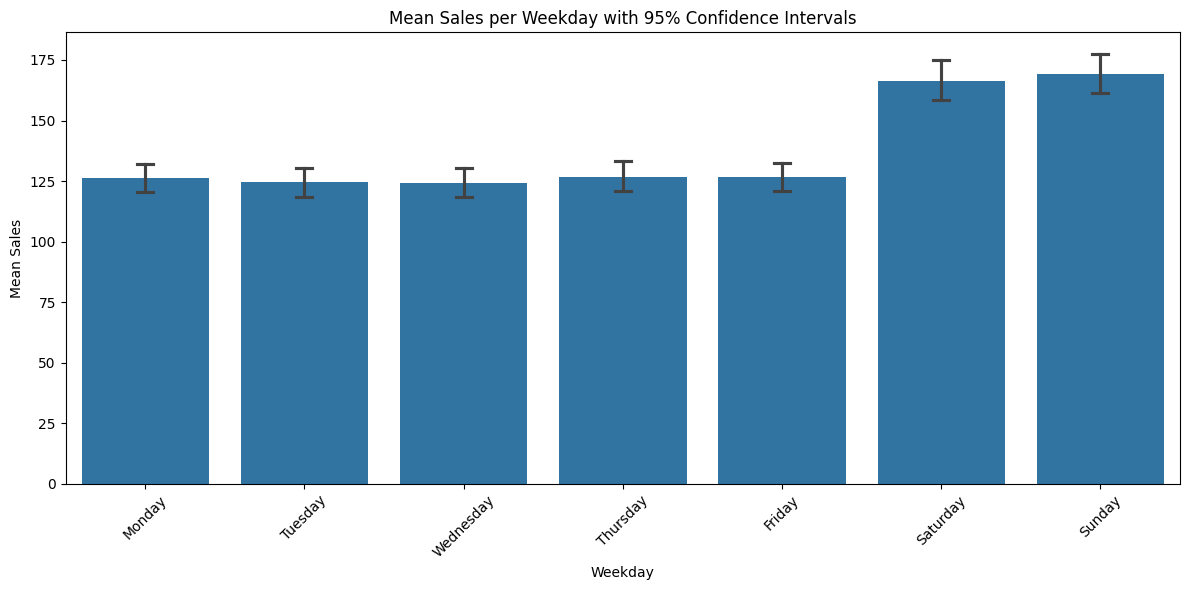

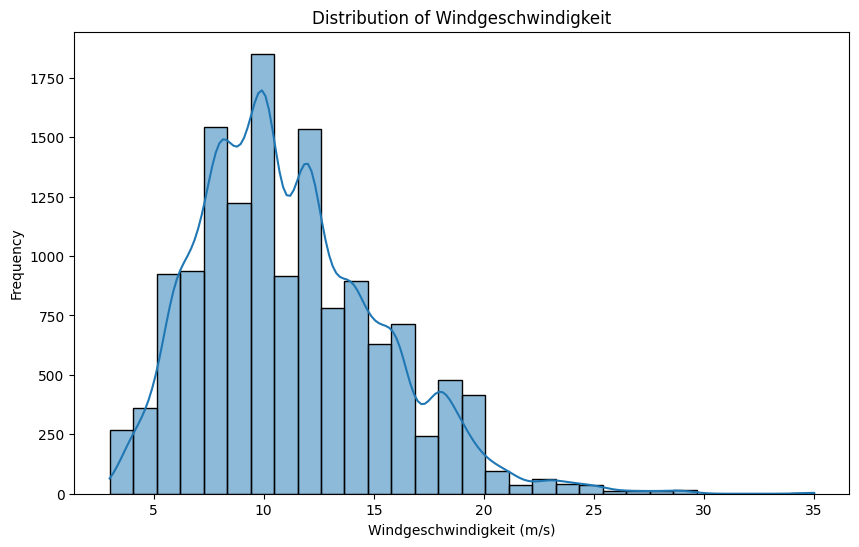

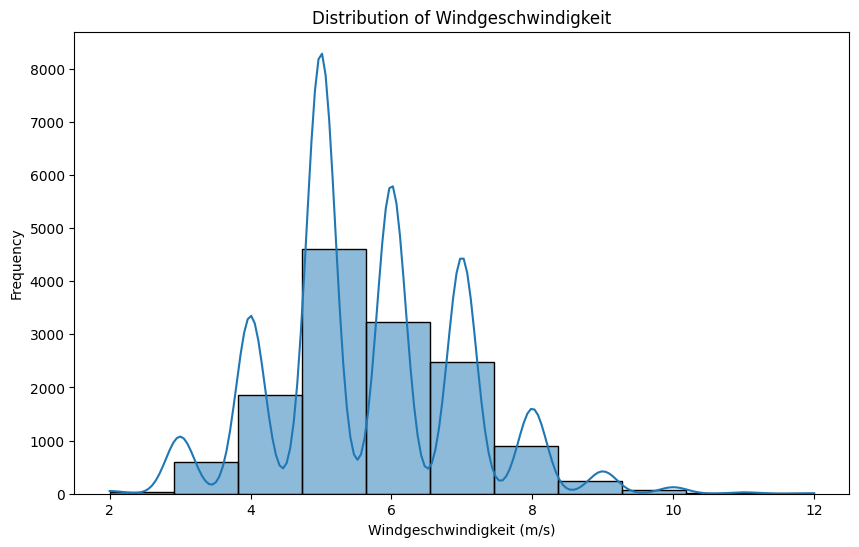

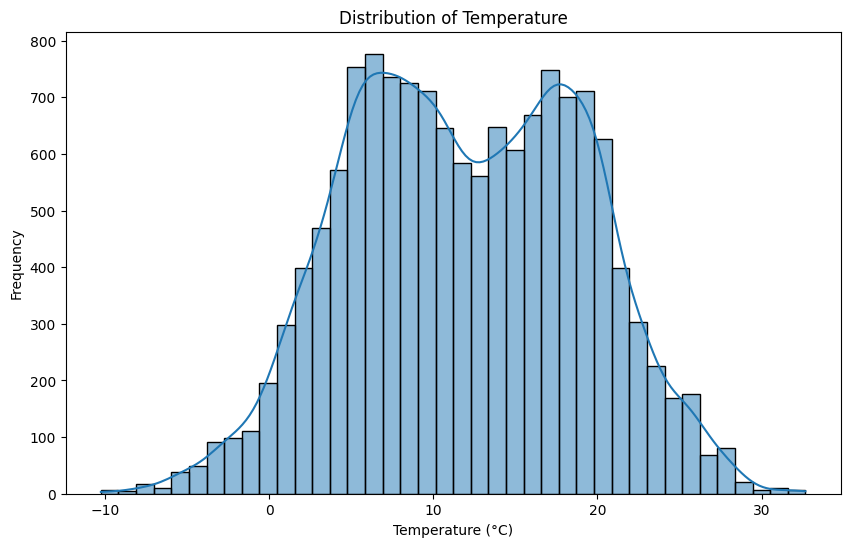

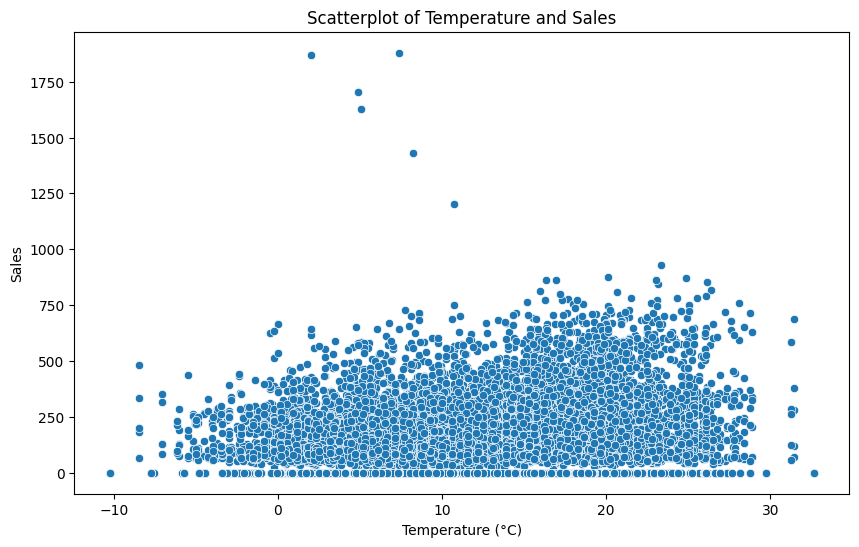

/tmp/ipykernel_1907/3952855693.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Windgeschwindigkeit_Beaufort', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


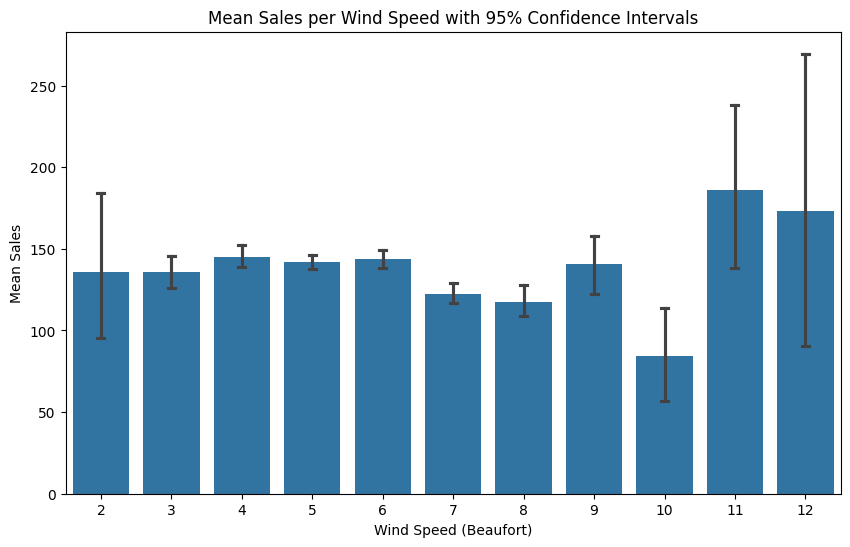

/tmp/ipykernel_1907/3952855693.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temperature_Category', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


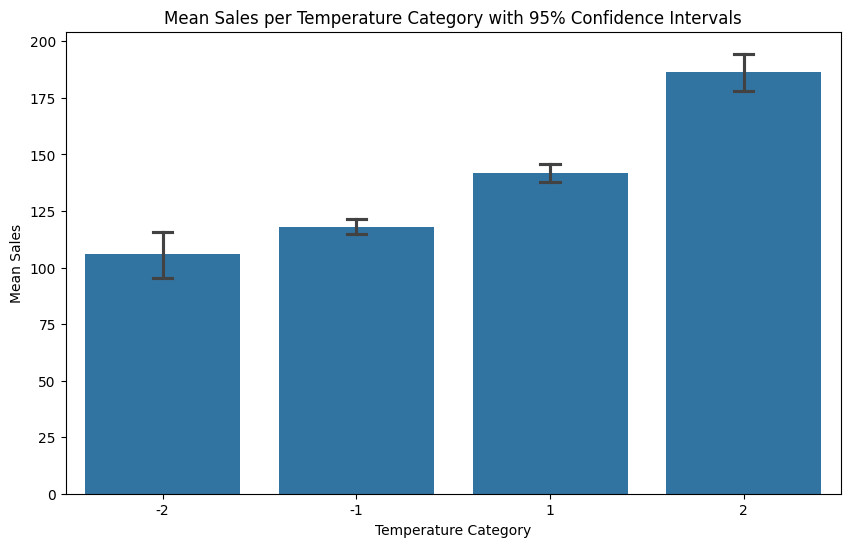

/tmp/ipykernel_1907/3952855693.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Bewoelkung', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


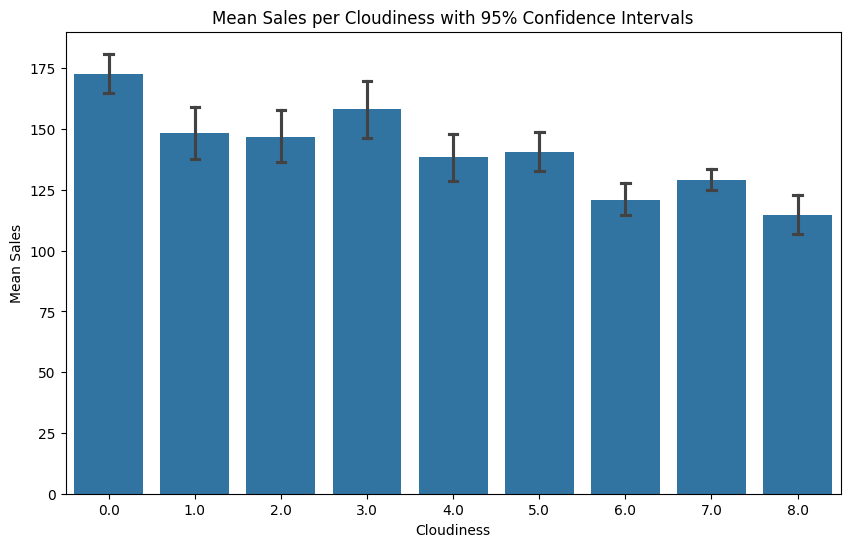

/tmp/ipykernel_1907/3952855693.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Cloud_Status', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


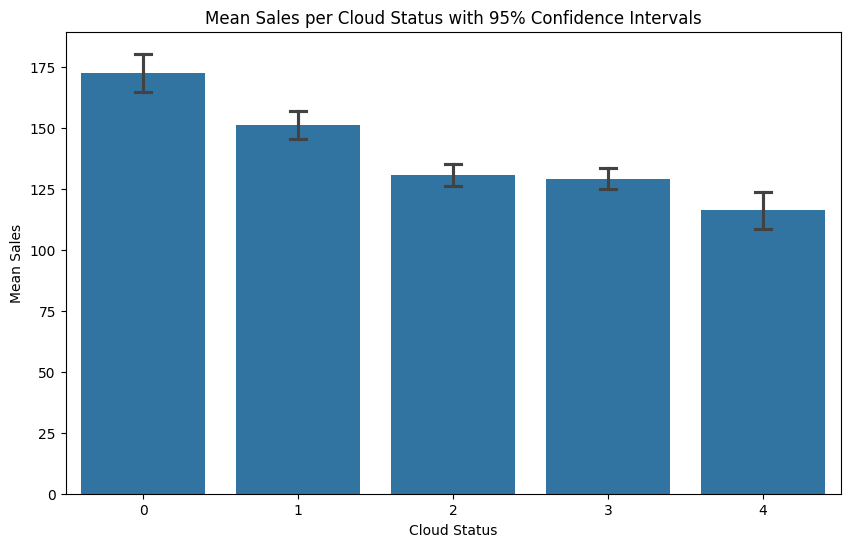

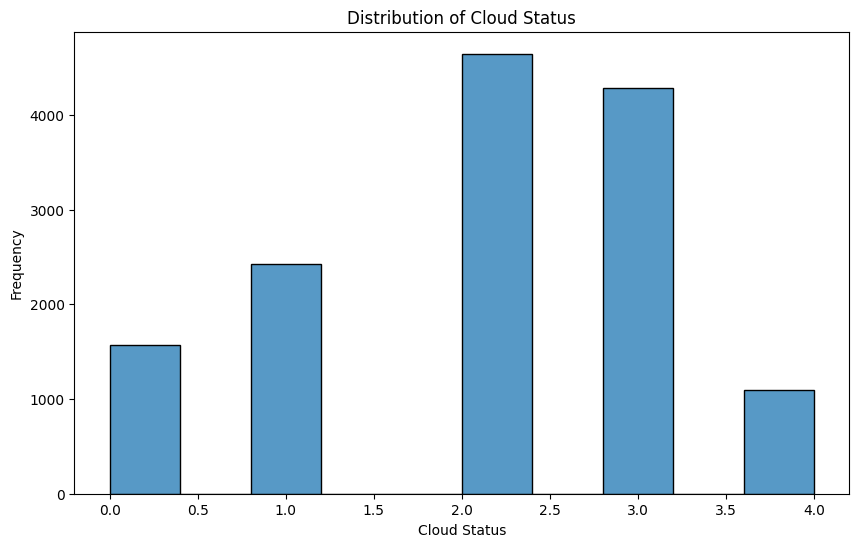

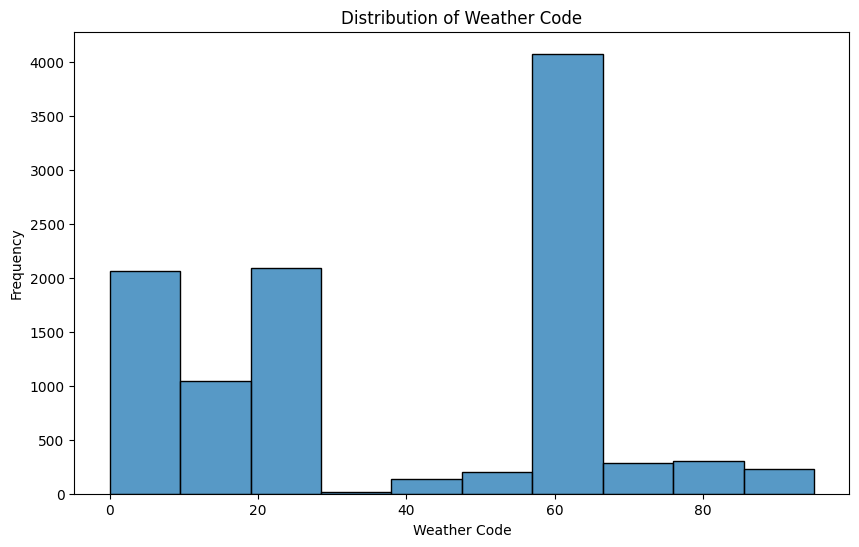

Descriptive Statistics for Windgeschwindigkeit:
count    14028.000000
mean        11.198389
std          4.126458
min          3.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         35.000000
Name: Windgeschwindigkeit, dtype: float64
count    14028.000000
mean         5.650057
std          1.360702
min          2.000000
25%          5.000000
50%          5.000000
75%          7.000000
max         12.000000
Name: Windgeschwindigkeit_Beaufort, dtype: float64
Descriptive Statistics for Temperatur:
count    14028.000000
mean        11.968318
std          7.144229
min        -10.250000
25%          6.375000
50%         11.725000
75%         17.637500
max         32.671428
Name: Temperatur, dtype: float64
count    13968.000000
mean         4.840564
std          2.565585
min          0.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          8.000000
Name: Bewoelkung, dtype: float64
count    14028.000000
mean         2.065797
std   

In [12]:
# DataVis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
!pip install fancyimpute
from fancyimpute import IterativeImputer, KNN

# Load the processed dataset
wetter_umsatzdaten_kiwo = pd.read_csv("../0_DataPreparation/processed_data.csv")
print(wetter_umsatzdaten_kiwo.columns)

# Step 1: Visualization - Mean sales per weekday
plt.figure(figsize=(12, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='Wochentag', y='Umsatz', data=wetter_umsatzdaten_kiwo, order=weekday_order, ci=95, capsize=0.1)
plt.title('Mean Sales per Weekday with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Visualization - Distribution of Windgeschwindigkeit
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Windgeschwindigkeit'], kde=True, bins=30)
plt.title('Distribution of Windgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Frequency')
plt.show()

# Step 2: Visualization - Distribution of Windgeschwindigkeit in Beaufort
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Windgeschwindigkeit_Beaufort'], kde=True, bins=11)
plt.title('Distribution of Windgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Frequency')
plt.show()

#visualization of the temperature
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Temperatur'], kde=True, bins=40)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')  
plt.ylabel('Frequency')
plt.show()

#scatter plot of the temperature and the sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperatur', y='Umsatz', data=wetter_umsatzdaten_kiwo)
plt.title('Scatterplot of Temperature and Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.show()

#barplot of the wind speed and the sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Windgeschwindigkeit_Beaufort', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Wind Speed with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Wind Speed (Beaufort)')
plt.show()

#barplot of temperature categories and the sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Temperature_Category', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Temperature Category with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Temperature Category')
plt.show()

#barplot of Bewölkung and the sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Bewoelkung', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Cloudiness with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Cloudiness')
plt.show()

#barplot of CLoud_Status and the sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Cloud_Status', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Cloud Status with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Cloud Status')
plt.show()

#visualization of cloud status
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Cloud_Status'], kde=False, bins=10)
plt.title('Distribution of Cloud Status')
plt.xlabel('Cloud Status')
plt.ylabel('Frequency')
plt.show()

#visualization of the weather code
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Wettercode'], kde=False, bins=10)
plt.title('Distribution of Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.show()


# Step 3: Descriptive Statistics
print("Descriptive Statistics for Windgeschwindigkeit:")
print(wetter_umsatzdaten_kiwo['Windgeschwindigkeit'].describe())
print(wetter_umsatzdaten_kiwo['Windgeschwindigkeit_Beaufort'].describe())
print("Descriptive Statistics for Temperatur:")
print(wetter_umsatzdaten_kiwo['Temperatur'].describe())
print(wetter_umsatzdaten_kiwo['Bewoelkung'].describe())
print(wetter_umsatzdaten_kiwo['Cloud_Status'].describe())
print(wetter_umsatzdaten_kiwo['Wettercode'].describe())

print("Data visualization complete.")


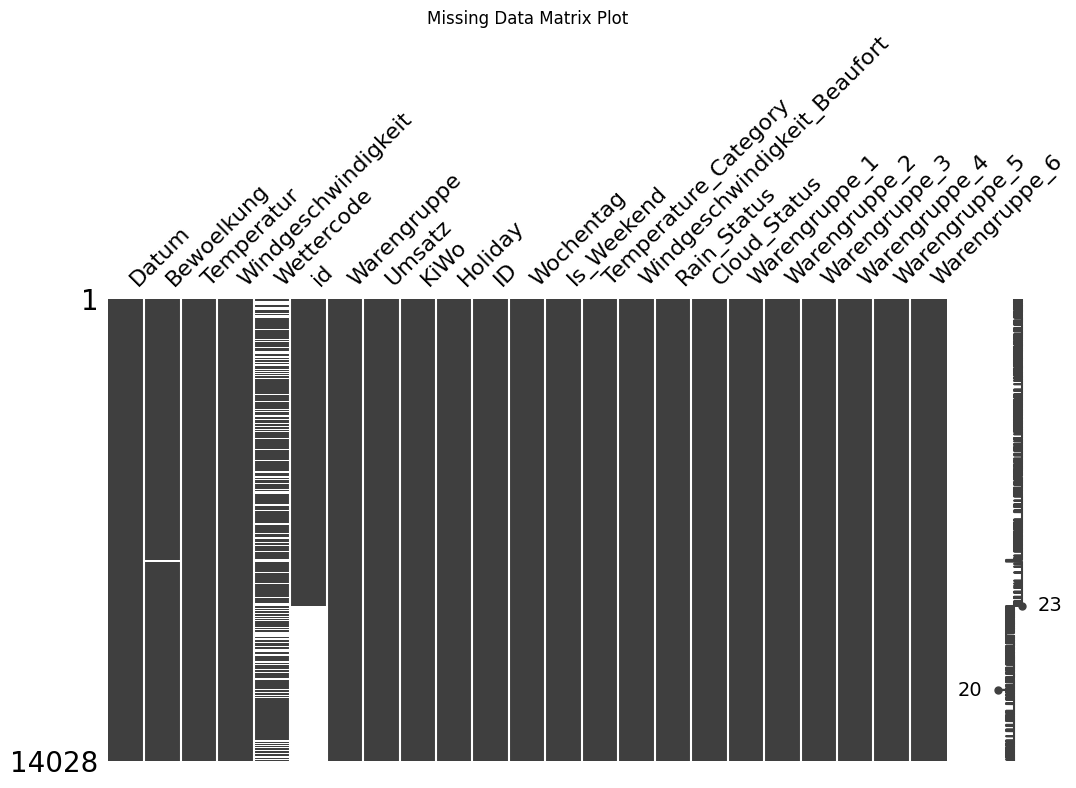

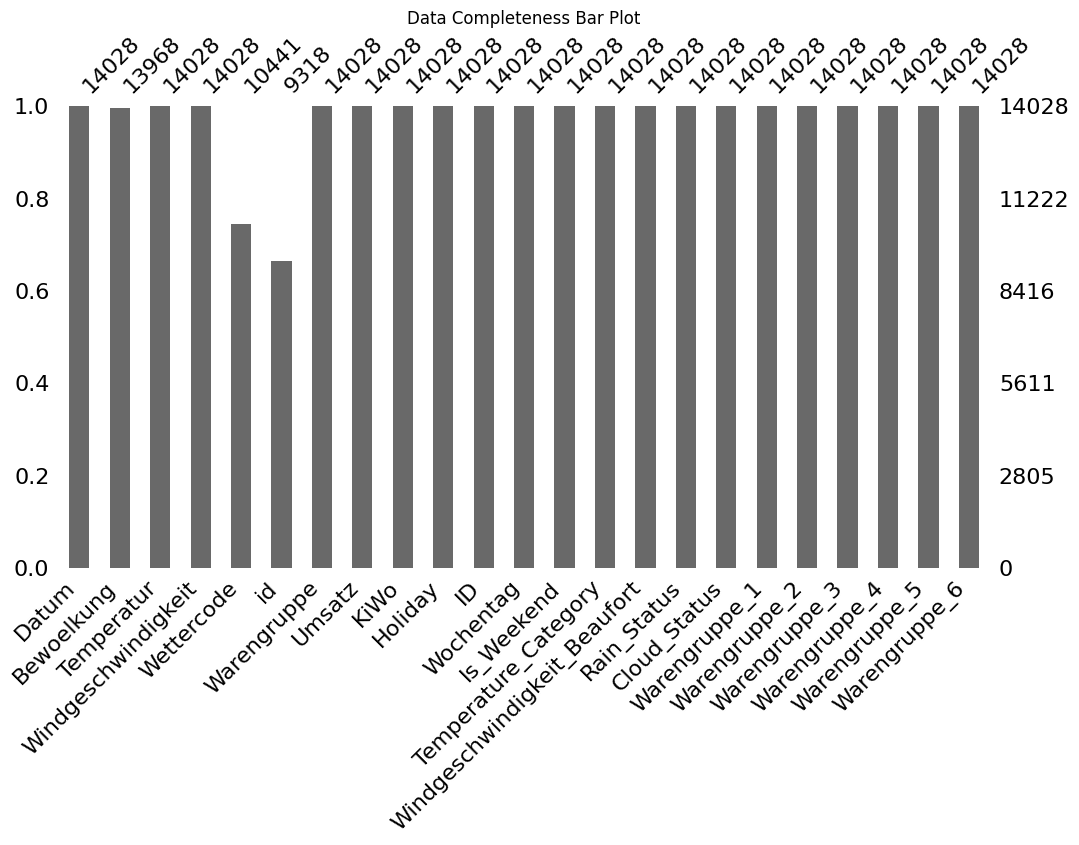

In [ ]:
#Load the data
data = pd.read_csv("../0_DataPreparation/processed_data.csv")

#Visualize missing data for 'Bewoelkung'
msno.matrix(data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()




In [ ]:
#barplot of complete data
msno.bar(data, figsize=(12, 6))
plt.title('Data Completeness Bar Plot')
plt.show()


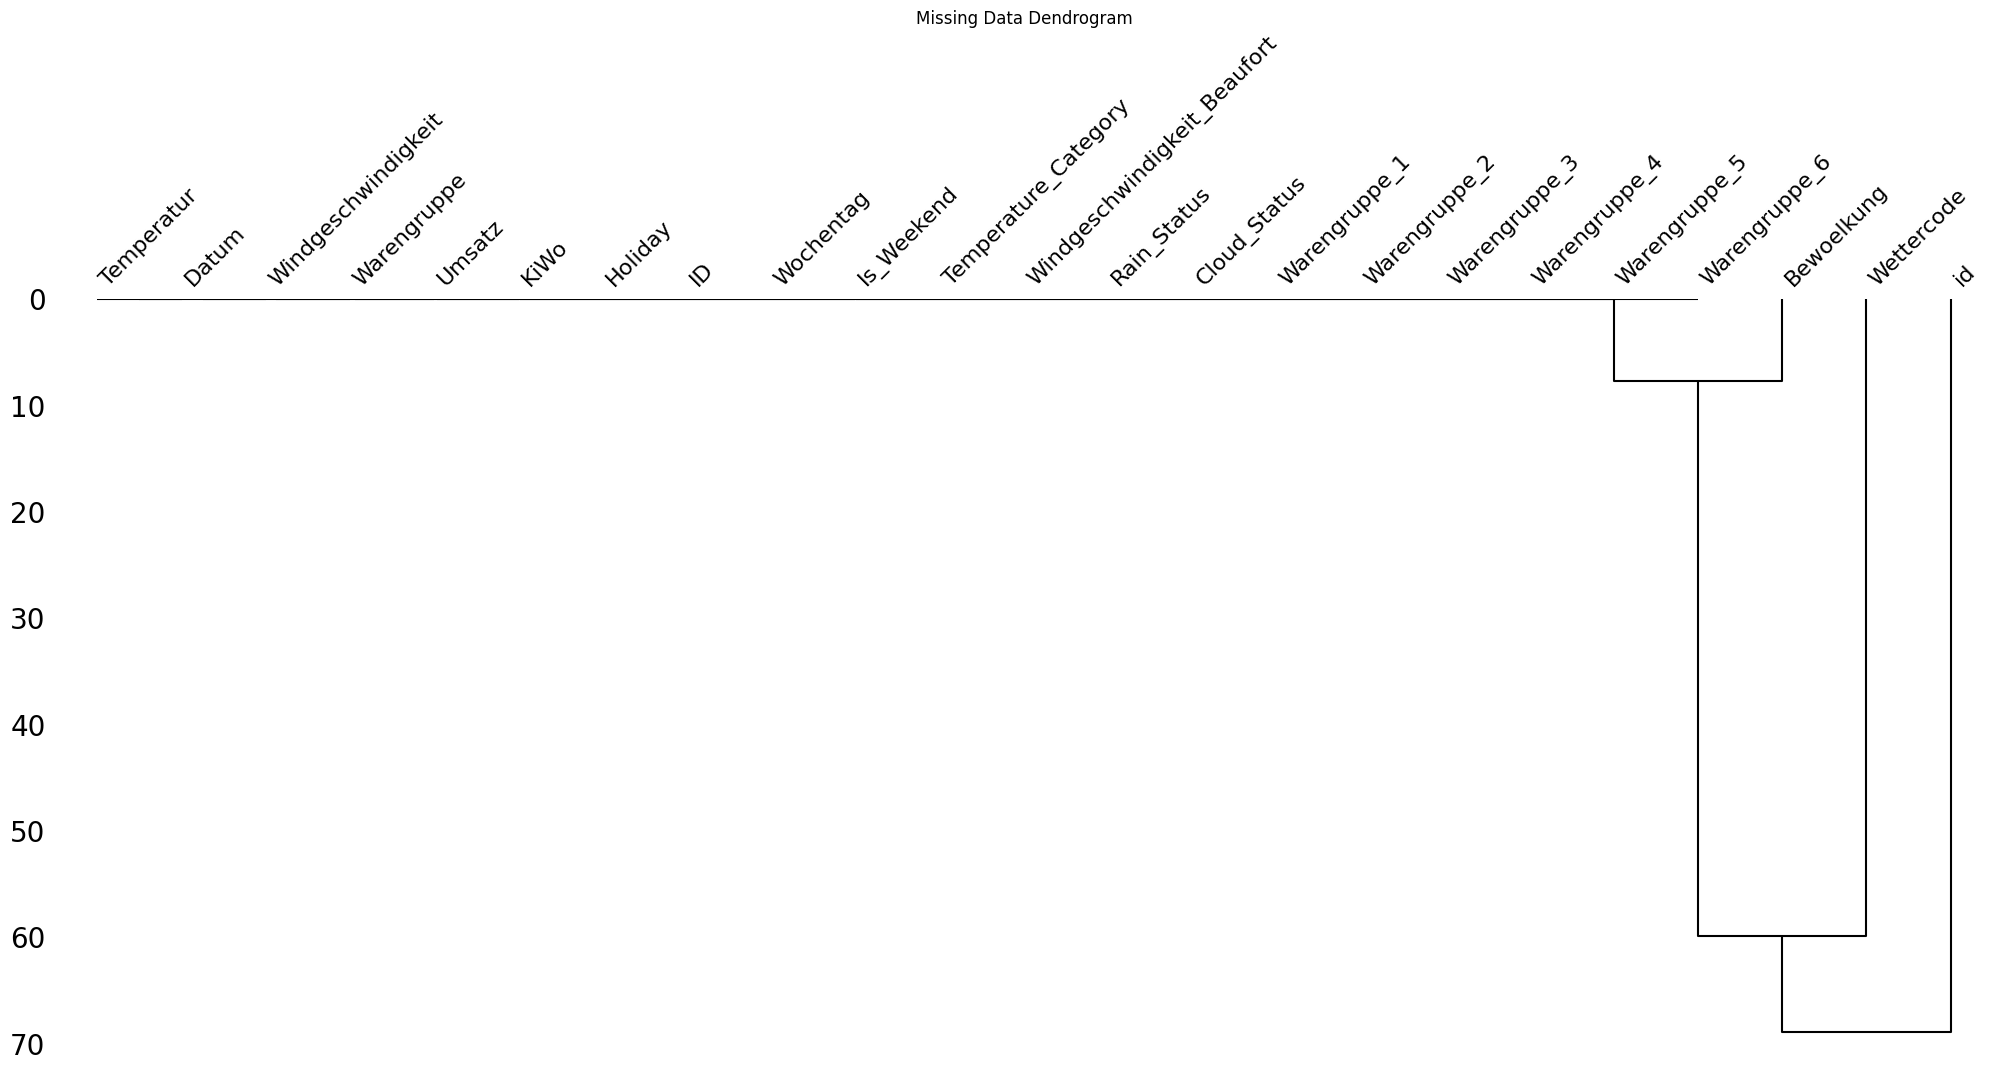

In [16]:
msno.dendrogram(data)
plt.title('Missing Data Dendrogram')
plt.show()

# Imputation of missing data

In [ ]:
#create a mask for the missing values in Bewoelkung
mask_cloudiness = data['Bewoelkung'].isna()
#create a mask for the missing values in Wettercode
mask_weathercode = data['Wettercode'].isna()

# KNN imputation

In [17]:
imputer_KNN = KNN()
data_knn = pd.DataFrame(imputer_KNN.fit_transform(data[['Bewoelkung', 'Wettercode']]), columns=['Bewoelkung', 'Wettercode'])

Imputing row 1/14028 with 0 missing, elapsed time: 14.782
Imputing row 101/14028 with 1 missing, elapsed time: 14.785
Imputing row 201/14028 with 0 missing, elapsed time: 14.787
Imputing row 301/14028 with 0 missing, elapsed time: 14.789
Imputing row 401/14028 with 1 missing, elapsed time: 14.790
Imputing row 501/14028 with 1 missing, elapsed time: 14.793
Imputing row 601/14028 with 0 missing, elapsed time: 14.794
Imputing row 701/14028 with 0 missing, elapsed time: 14.795
Imputing row 801/14028 with 0 missing, elapsed time: 14.797
Imputing row 901/14028 with 0 missing, elapsed time: 14.797
Imputing row 1001/14028 with 0 missing, elapsed time: 14.798
Imputing row 1101/14028 with 0 missing, elapsed time: 14.799
Imputing row 1201/14028 with 0 missing, elapsed time: 14.800
Imputing row 1301/14028 with 0 missing, elapsed time: 14.802
Imputing row 1401/14028 with 0 missing, elapsed time: 14.803
Imputing row 1501/14028 with 0 missing, elapsed time: 14.805
Imputing row 1601/14028 with 1 missi